# Optimization methods

In [1]:
%matplotlib notebook

import matplotlib
matplotlib.interactive(True)
matplotlib.use('gdk')

from math import sqrt
import numpy as np
import pylab as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import sin
plt.ion()
# %matplotlib inline


/home/dana_zl/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
def Smoothing1(mean, eps):       
    return np.sqrt(mean + eps)

def Smoothing2(mean, eps):
    return np.sqrt(mean) + eps

Smoothing = Smoothing1

In [3]:
def GD(theta, grad, state):
    theta_new = theta - state['eta'] * grad(theta)
    return theta_new, state

def Momentum(theta, grad, state):
    if 'v' not in state:
        state['v'] = np.zeros(shape = len(theta))
        
    state['v'] = state['gamma'] * state['v'] + state['eta'] * grad(theta)
    theta_new = theta - state['v']
    return theta_new, state
    
def NAG(theta, grad, state):
    if 'v' not in state:
        state['v'] = np.zeros(shape = len(theta))
        
    state['v'] = state['gamma'] * state['v'] + state['eta'] * grad(theta - state['gamma'] * state['v'])
    theta_new = theta - state['v']
    return theta_new, state

def Adagrad(theta, grad, state):
    if 'G' not in state:
        state['G'] = np.zeros(shape = len(theta))
        
    gr =  grad(theta)
    state['G'] += gr ** 2
    theta_new = theta - (state['eta'] / Smoothing(state['G'], state['eps'])) * gr
    return theta_new, state

def RMSprop(theta, grad, state):
    if 'E_g' not in state:
        state['E_g'] = np.zeros(shape = len(theta))
        
    gr =  grad(theta)
    state['E_g'] = state['E_g'] * state['gamma'] + (1 - state['gamma']) * (gr ** 2)
    theta_new = theta - (state['eta'] / Smoothing(state['E_g'], state['eps'])) * gr
    return theta_new, state

def Adadelta(theta, grad, state):
    if 'E_g' not in state:
        state['E_g'] = np.zeros(shape = len(theta))
        
    if 'E_delta_theta' not in state:
        state['E_delta_theta'] = np.zeros(shape = len(theta))
        
    gr =  grad(theta)
   
    state['E_g'] = state['E_g'] * state['gamma'] + (1 - state['gamma']) * (gr ** 2)
    
    delta_theta = (Smoothing(state['E_delta_theta'], state['eps']) / Smoothing(state['E_g'], state['eps'])) * gr
    theta_new = theta - delta_theta

    state['E_delta_theta'] = state['E_delta_theta'] * state['gamma'] + (1 - state['gamma']) * (delta_theta ** 2)
    
    return theta_new, state

def Adam(theta, grad, state):
    if 'm' not in state:
        state['m'] = np.zeros(shape = len(theta))
        
    if 'v' not in state:
        state['v'] = np.zeros(shape = len(theta))
        
    if 't' not in state:
        state['t'] = 1
    
    gr = grad(theta)
    state['m'] = state['beta1'] * state['m'] + (1 - state['beta1']) * gr
    state['v'] = state['beta2'] * state['v'] + (1 - state['beta2']) * (gr ** 2)
    
    m_roof = state['m'] / (1 - state['beta1'] ** state['t'])
    v_roof = state['v'] / (1 - state['beta2'] ** state['t'])
    
    state['t'] += 1
    
    theta_new = theta - (state['eta'] / Smoothing(v_roof, state['eps'])) * m_roof
    return theta_new, state

In [4]:
#theta - текущий вектор параметров, 1D numpy array
#grad - градиент функции (функция одного аргумента,возвращает 1D numpy array такого же размера как и theta)
#name - имя оптимизатора (’GD’|’Momentum’|’NAG’|’Adagrad’|’RMSprop’|’Adadelta’|’Adam’)
#state: словарь (dict) с состоянием оптимизатора. Содержит параметры методов, а также вспомогательные поля

def step_(theta, grad, name, state):
    if name == 'GD':
        theta_new, state = GD(theta, grad, state)
    if name == 'Momentum':
        theta_new, state = Momentum(theta, grad, state)
    if name == 'NAG':
        theta_new, state = NAG(theta, grad, state)
    if name == 'Adagrad':
        theta_new, state = Adagrad(theta, grad, state)
    if name == 'RMSprop':
        theta_new, state = RMSprop(theta, grad, state)
    if name == 'Adadelta':
        theta_new, state = Adadelta(theta, grad, state)
    if name == 'Adam':
        theta_new, state = Adam(theta, grad, state)
    if name == 'Adagrad1_with_ignor':
        theta_new, state = Adagrad1_with_ignor(theta, grad, state)
    if name == 'Adagrad1_without_ignor':
        theta_new, state = Adagrad1_without_ignor(theta, grad, state)
    if name == 'Adagrad2':
        theta_new, state = Adagrad2(theta, grad, state)
    if name == 'Adadelta1_with_ignor':
        theta_new, state = Adadelta1_with_ignor(theta, grad, state)
    if name == 'Adadelta1_without_ignor':
        theta_new, state = Adadelta1_without_ignor(theta, grad, state)
    if name == 'Adadelta2':
        theta_new, state = Adadelta2(theta, grad, state)
        
    return theta_new, state

## Исследовательская часть

### Визуализация

In [5]:
def J1(x, y):
    return x ** 2 - y ** 2

def J2(x, y):
    return x ** 2 + y ** 2

def J3(x, y):
    return (x ** 2) * np.sin(x) + (y ** 2) * np.sin(y)

def J4(x, y):
    return (x ** 2) * np.sin(x ** 2) + (y ** 2) * np.sin(y ** 2)

def J1_grad(param):
    return np.asarray([2 * param[0], -2 * param[1]])

def J2_grad(param):
    return np.asarray([2 * param[0], 2 * param[1]])

def J3_grad(param):
    return np.asarray([2 * param[0] *  np.sin(param[0]) + (param[0] ** 2) * np.cos(param[0]),\
                       2 * param[1] *  np.sin(param[1]) + (param[1] ** 2) * np.cos(param[1])])

def J4_grad(param):
    return np.asarray([2 * param[0] * np.sin(param[0] ** 2) + 2 * (param[0] ** 3) * np.cos(param[0] ** 2),\
                       2 * param[1] * np.sin(param[1] ** 2) + 2 * (param[1] ** 3) * np.cos(param[1] ** 2)])

In [6]:
def state_from_name(name):
    if name == 'GD':
        return  {'eta':0.1}
    if name == 'Momentum':
        return {'eta':0.1, 'gamma':0.7}
    if name == 'NAG':
        return {'eta':0.1, 'gamma':0.7}
    if name == 'Adagrad':
        return {'eta':0.01, 'eps': 0.001}
    if name == 'Adagrad1_with_ignor':
        return {'eta':0.2, 'eps': 0e-4}
    if name == 'Adagrad1_without_ignor':
        return {'eta':0.2, 'eps': 0e-4}
    if name == 'Adagrad2':
        return {'eta':0.2, 'eps': 0e-4}
    if name == 'RMSprop':
        return {'eta':0.3, 'gamma':0.7, 'eps':0e-2}
    if name == 'Adadelta':
        return {'gamma':0.7, 'eps': 0.00001}
    if name == 'Adadelta1_with_ignor':
        return {'gamma':0.7, 'eps': 0.00001}
    if name == 'Adadelta1_without_ignor':
        return {'gamma':0.7, 'eps': 0.00001}
    if name == 'Adadelta2':
        return {'gamma':0.7, 'eps': 0.00001}
    if name == 'Adam': 
        return {'eta':0.1, 'gamma':0.7, 'eps':0.0001, 'beta1':0.9, 'beta2':0.999}

def get_function_value (function, x_min, x_max, y_min, y_max, cnt_dots):
    x = np.linspace(x_min, x_max, cnt_dots)
    y = np.linspace(y_min, y_max, cnt_dots)
    x, y = np.meshgrid(x, y)
    z = function(x, y)
#     z = [function(x, y) for i in range (cnt_dots) for j in range(cnt_dots)]
    
    return x, y, z

def get_params_track (method_name, func, func_grad, param_begin, cnt_iter):
    theta = param_begin
    state = state_from_name(method_name)
    track = [theta]
    for i in range(cnt_iter):
        theta, state = step_(theta, func_grad, method_name, state)
#         print theta
        track.append(theta)
    
    track = np.asarray(track)
    x = track[:, 0]
    y = track[:, 1]
    z = func(x, y)

    return x, y, z

def convergence_visualization(methods_name, func, func_grad, start_point, cnt_iters, 
                              subplot_dim1, subplot_dim2, figsize, xy_intervals):
    
    fig = plt.figure(figsize=figsize)
    p = 1
    for point in start_point:
        ax = fig.add_subplot(subplot_dim1, subplot_dim2, p, projection='3d')
        x, y, z = get_function_value(func, xy_intervals[p - 1][0], \
                                     xy_intervals[p - 1][1], xy_intervals[p - 1][2], xy_intervals[p - 1][3], 600)
        ax.plot_surface(x, y, z, linewidth=0, cmap= cm.coolwarm)
        
        for method in methods_name:
            x1, y1, z1 = get_params_track(method, func, func_grad, point, cnt_iters[p - 1])
            ax.plot(x1, y1, z1, label=method, linewidth = 2)
            
        ax.legend(prop={'size':10})
        p += 1

    plt.show()
    # plt.draw()

    

<IPython.core.display.Javascript object>


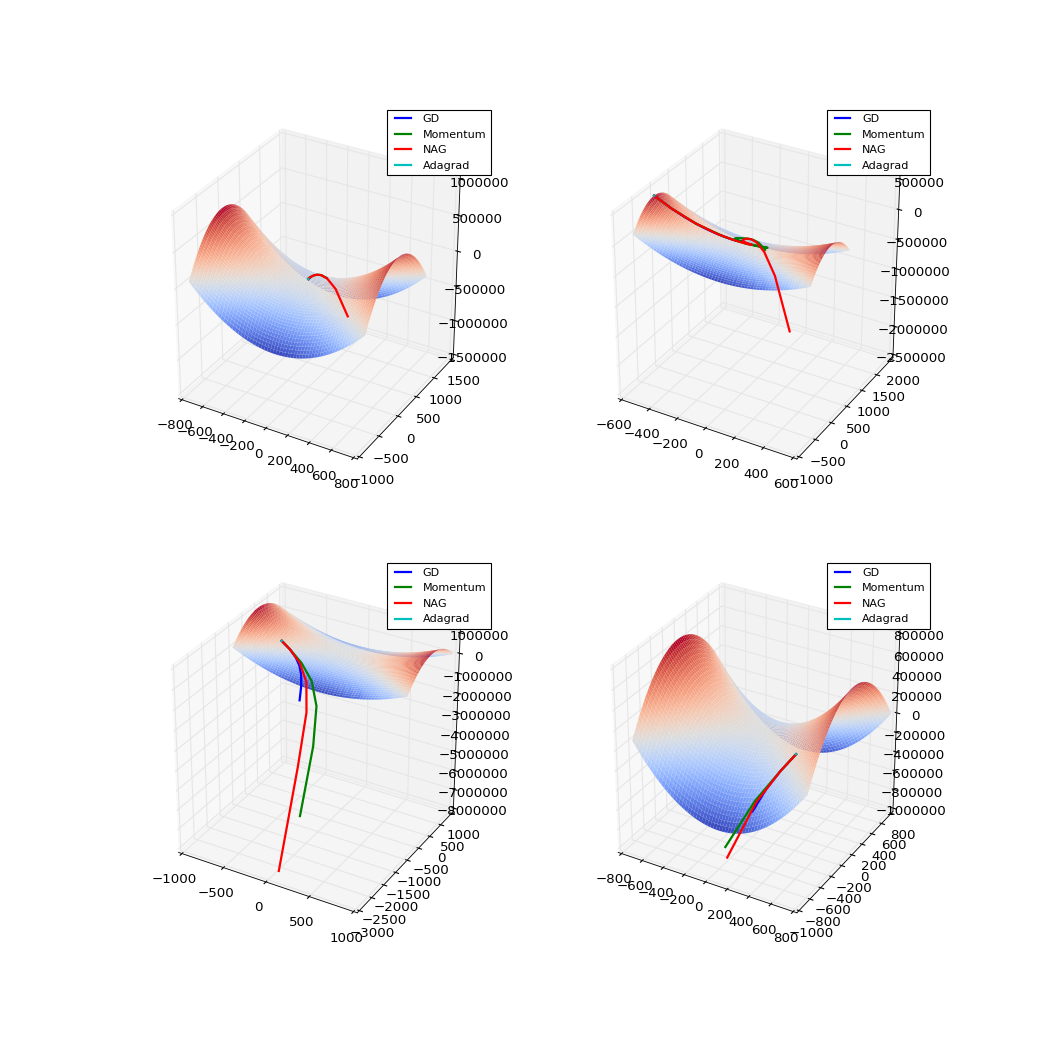

In [7]:
start_points = [np.asarray([1.0, 1.0]), np.asarray([-600.0, 1.0]), np.asarray([-600, -400]), np.asarray([500.0, -400.0])]
convergence_visualization(['GD', 'Momentum', 'NAG', 'Adagrad'], J1, J1_grad, start_points, \
                          (19, 20, 6, 3), 2, 2, (13, 13), \
                          xy_intervals = [(-800, 800, -800, 800), (-600, 600, -600, 600),\
                                          (-1000, 1000, -1000, 1000), (-800, 800, -800, 800)])

<IPython.core.display.Javascript object>


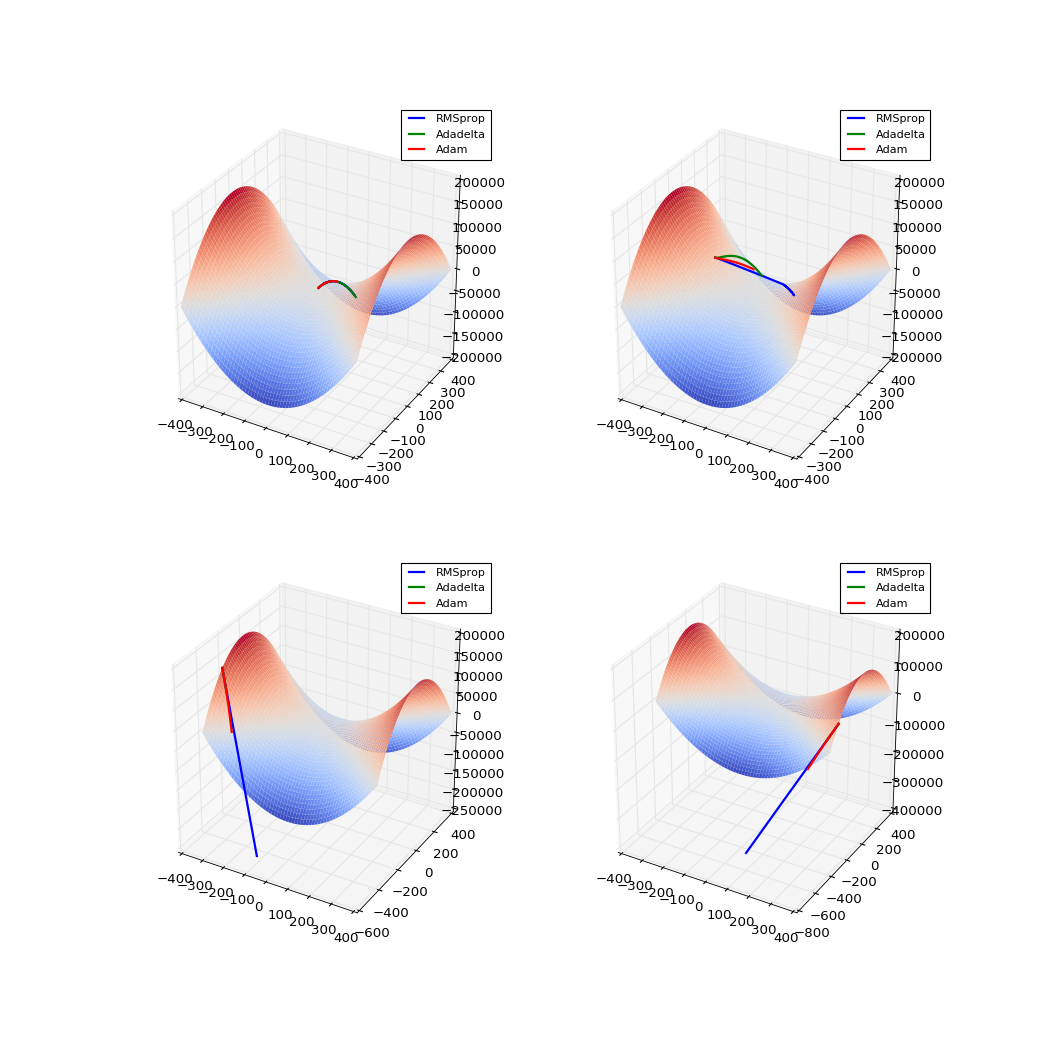

In [8]:
start_points = [np.asarray([1.0, 1.0]), np.asarray([-200.0, 1.0]), np.asarray([-400, -200]), np.asarray([400.0, -300.0])]
convergence_visualization(['RMSprop', 'Adadelta', 'Adam'], J1, J1_grad, start_points, \
                          (1000, 1000, 1000, 1000), 2, 2, (13, 13), \
                          xy_intervals = [(-400, 400, -400, 400), (-400, 400, -400, 400),\
                                          (-400, 400, -400, 400), (-400, 400, -400, 400)])

<IPython.core.display.Javascript object>


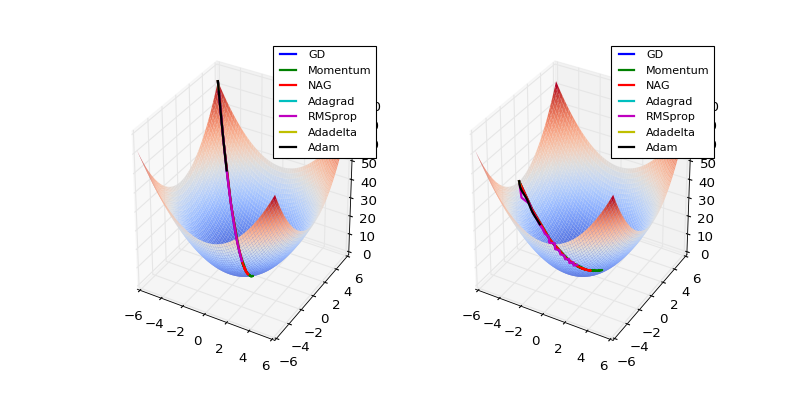

In [9]:
start_points = [np.asarray([-6.0, 6.0]), np.asarray([-6.0, 0.1])]
convergence_visualization(['GD', 'Momentum', 'NAG', 'Adagrad', 'RMSprop', 'Adadelta', 'Adam'], J2, J2_grad, \
                           start_points, (20, 20), 1, 2, (10, 5), [(-6, 6, -6, 6), (-6, 6, -6, 6)])

<IPython.core.display.Javascript object>


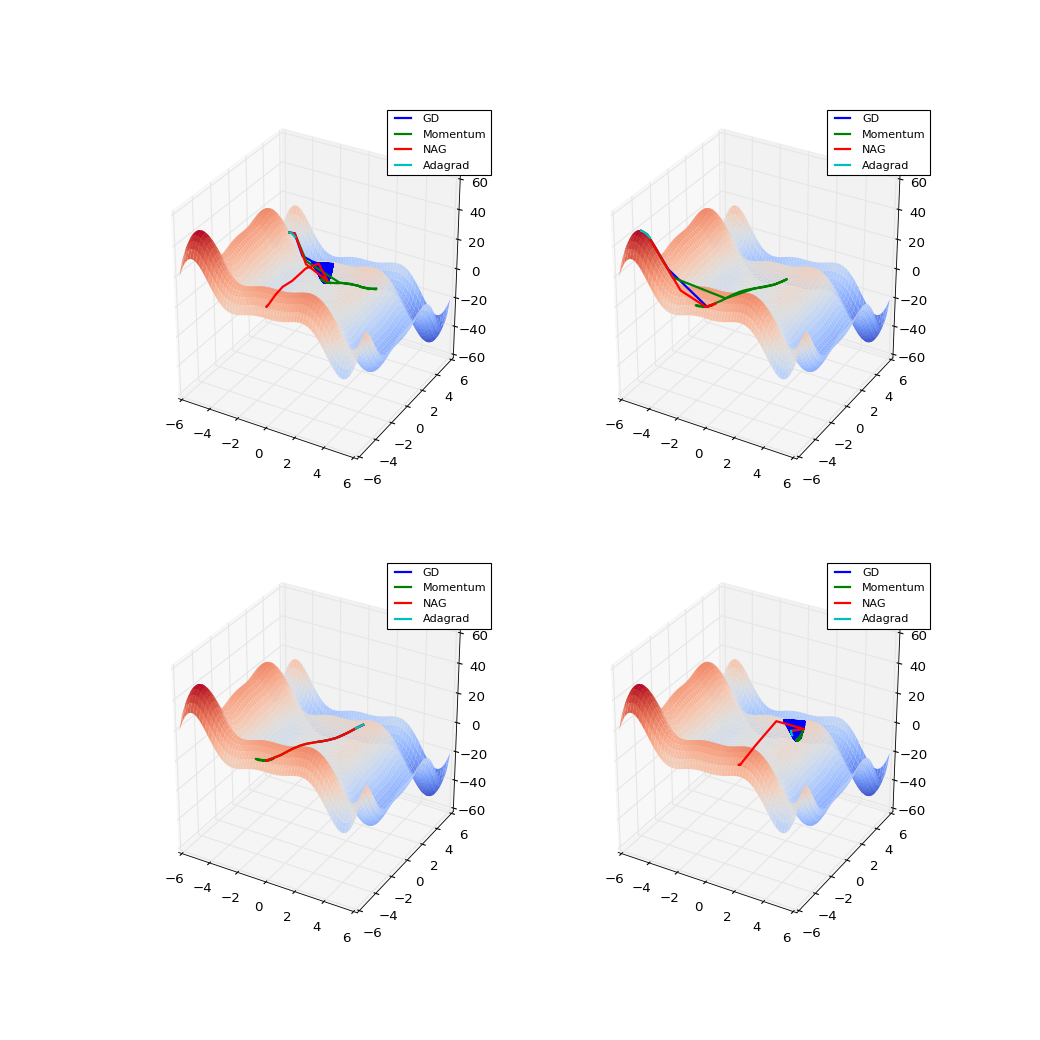

In [10]:
start_points = [np.asarray([-5.0, 5.0]), np.asarray([-5.0, -5.0]), np.asarray([2, 2]), np.asarray([0.1, 4.0])]
convergence_visualization(['GD', 'Momentum', 'NAG', 'Adagrad'], J3, J3_grad, start_points, \
                          (235, 235, 235, 235), 2, 2, (13, 13),
                          [(-6, 6, -6, 6), (-6, 6, -6, 6), (-6, 6, -6, 6), (-6, 6, -6, 6),])

<IPython.core.display.Javascript object>


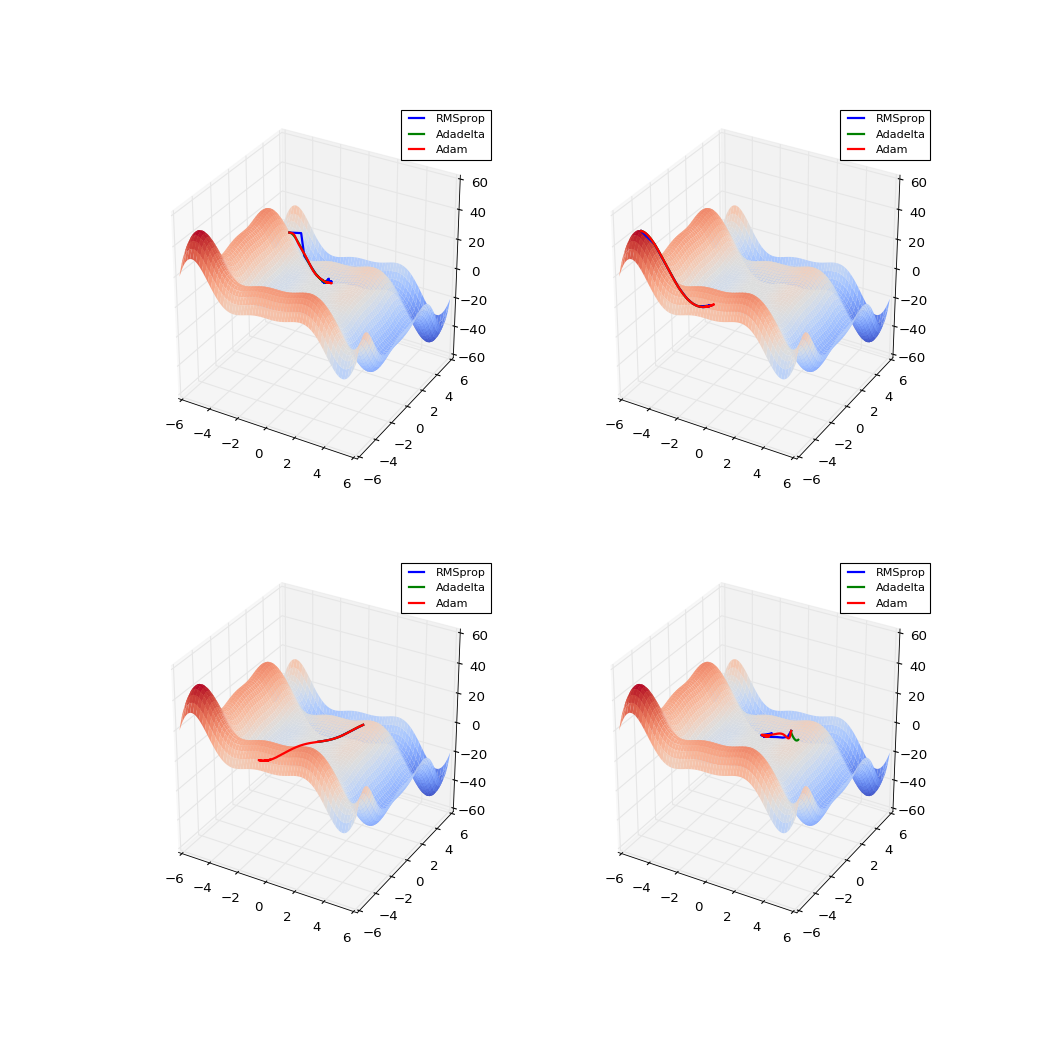

In [11]:
start_points = [np.asarray([-5.0, 5.0]), np.asarray([-5.0, -5.0]), np.asarray([2, 2]), np.asarray([0.1, 4.0])]
convergence_visualization(['RMSprop', 'Adadelta', 'Adam'], J3, J3_grad, start_points, \
                          (235, 235, 235, 235), 2, 2, (13, 13),
                          [(-6, 6, -6, 6), (-6, 6, -6, 6), (-6, 6, -6, 6), (-6, 6, -6, 6),])

<IPython.core.display.Javascript object>


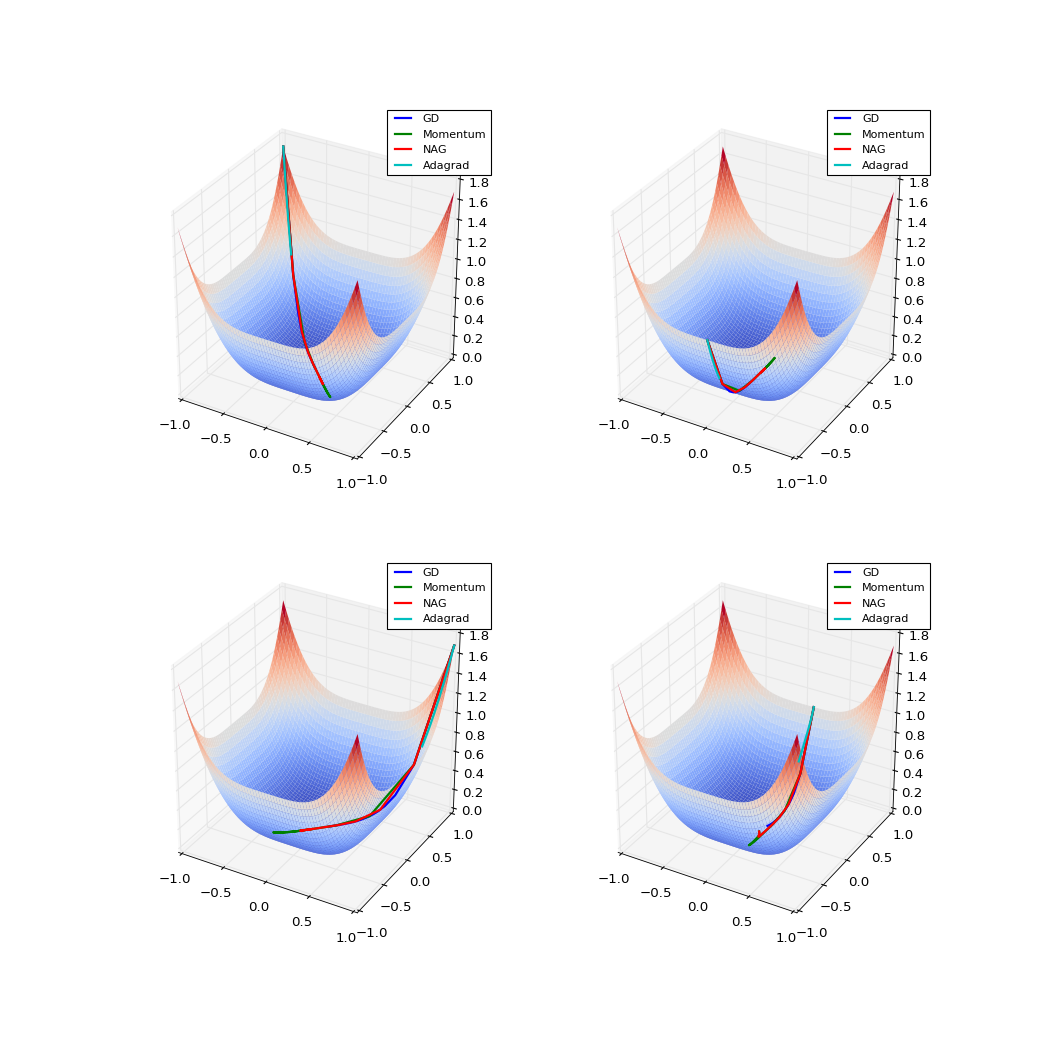

In [12]:
start_points = [np.asarray([-1.0, 1.0]), np.asarray([0.01, -1.0]), np.asarray([1, 1]), np.asarray([0.1, 1.0])]
convergence_visualization(['GD', 'Momentum', 'NAG', 'Adagrad'], J4, J4_grad, start_points, (160, 160, 160, 160)\
                          , 2, 2, (13, 13), [(-1, 1, -1, 1), (-1, 1, -1, 1), (-1, 1, -1, 1), (-1, 1, -1, 1)])

<IPython.core.display.Javascript object>


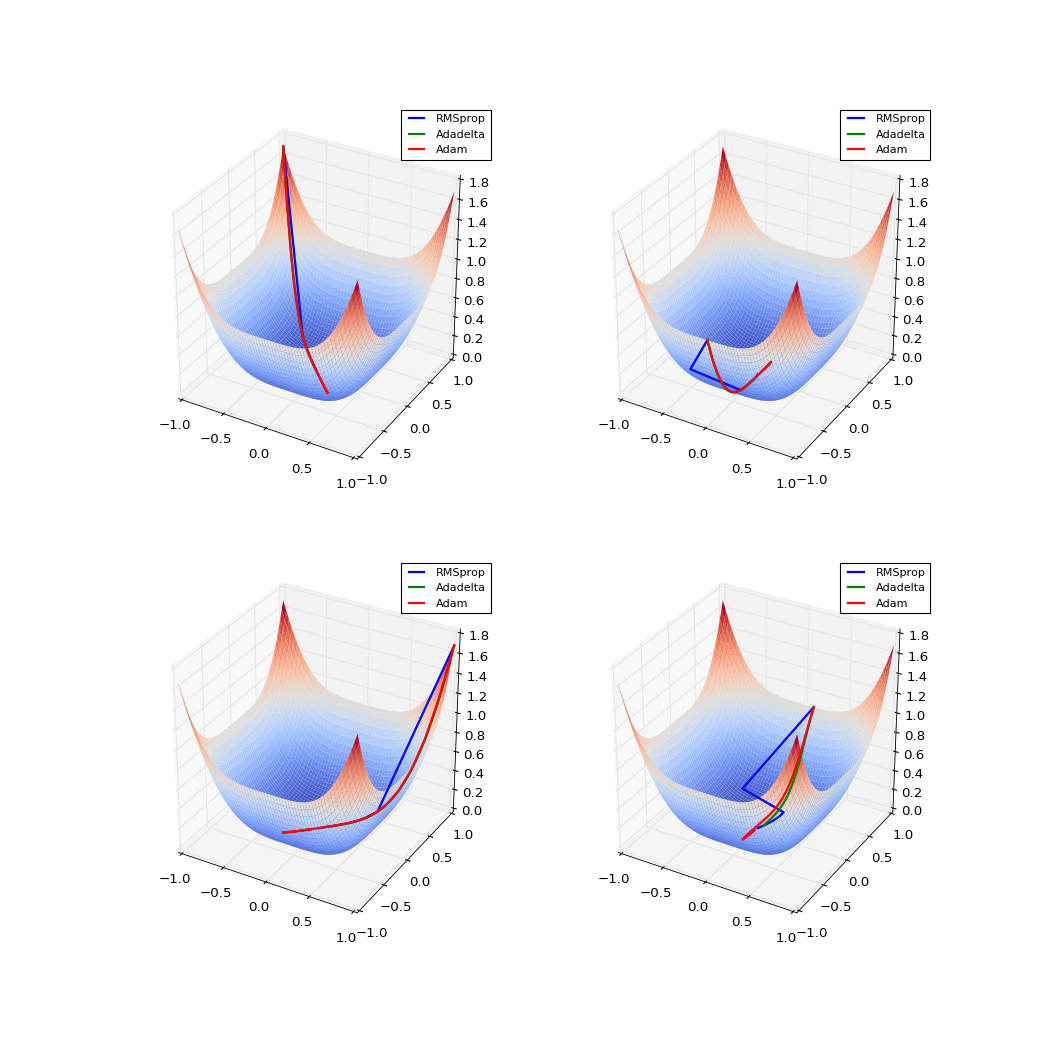

In [13]:
start_points = [np.asarray([-1.0, 1.0]), np.asarray([0.01, -1.0]), np.asarray([1, 1]), np.asarray([0.1, 1.0])]
convergence_visualization(['RMSprop', 'Adadelta', 'Adam'], J4, J4_grad, start_points, (160, 160, 160, 160)\
                          , 2, 2, (13, 13), [(-1, 1, -1, 1), (-1, 1, -1, 1), (-1, 1, -1, 1), (-1, 1, -1, 1)])

### Выбор стратегии сглаживания

<IPython.core.display.Javascript object>


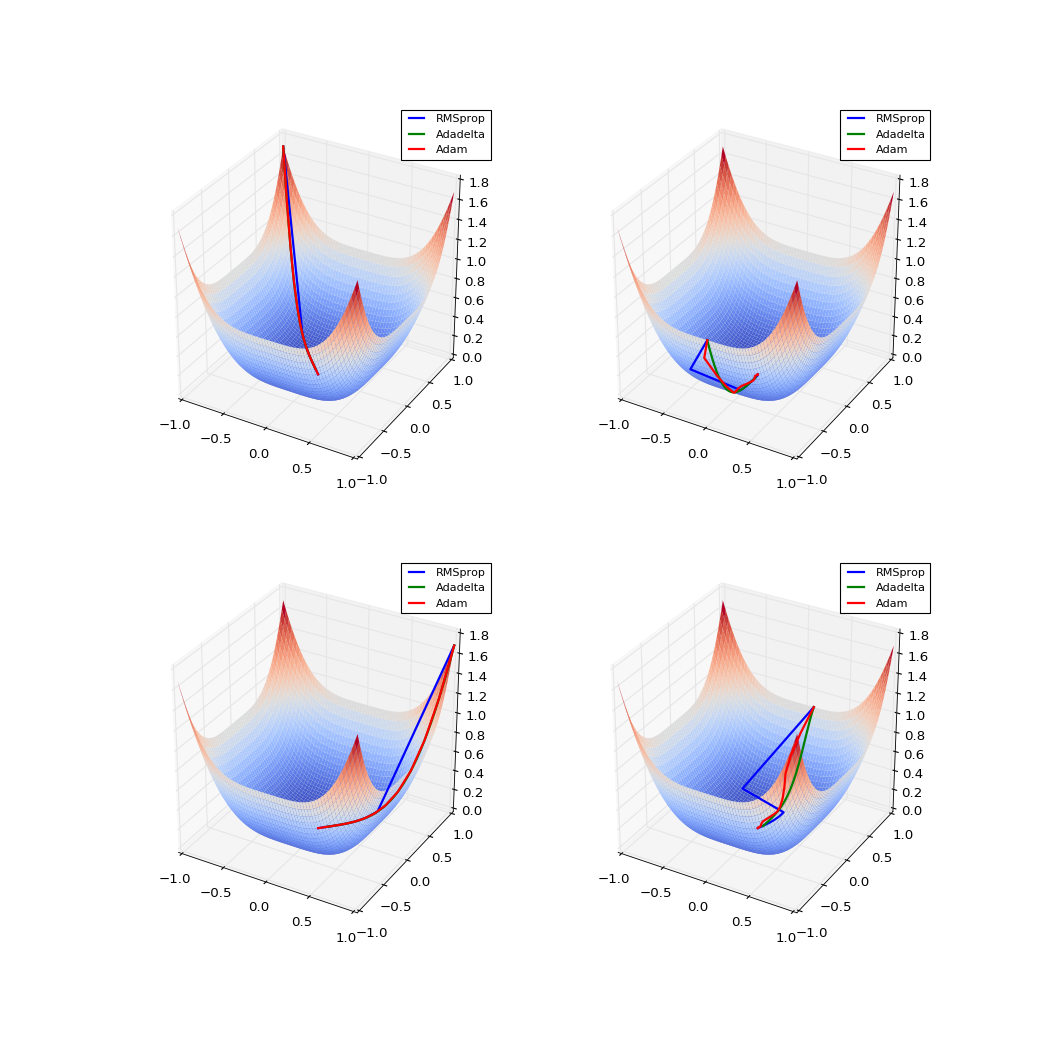

In [72]:
Smoothing = Smoothing1
start_points = [np.asarray([-1.0, 1.0]), np.asarray([0.01, -1.0]), np.asarray([1, 1]), np.asarray([0.1, 1.0])]
convergence_visualization(['RMSprop', 'Adadelta', 'Adam'], J4, J4_grad, start_points, (160, 160, 160, 160)\
                          , 2, 2, (13, 13), [(-1, 1, -1, 1), (-1, 1, -1, 1), (-1, 1, -1, 1), (-1, 1, -1, 1)])

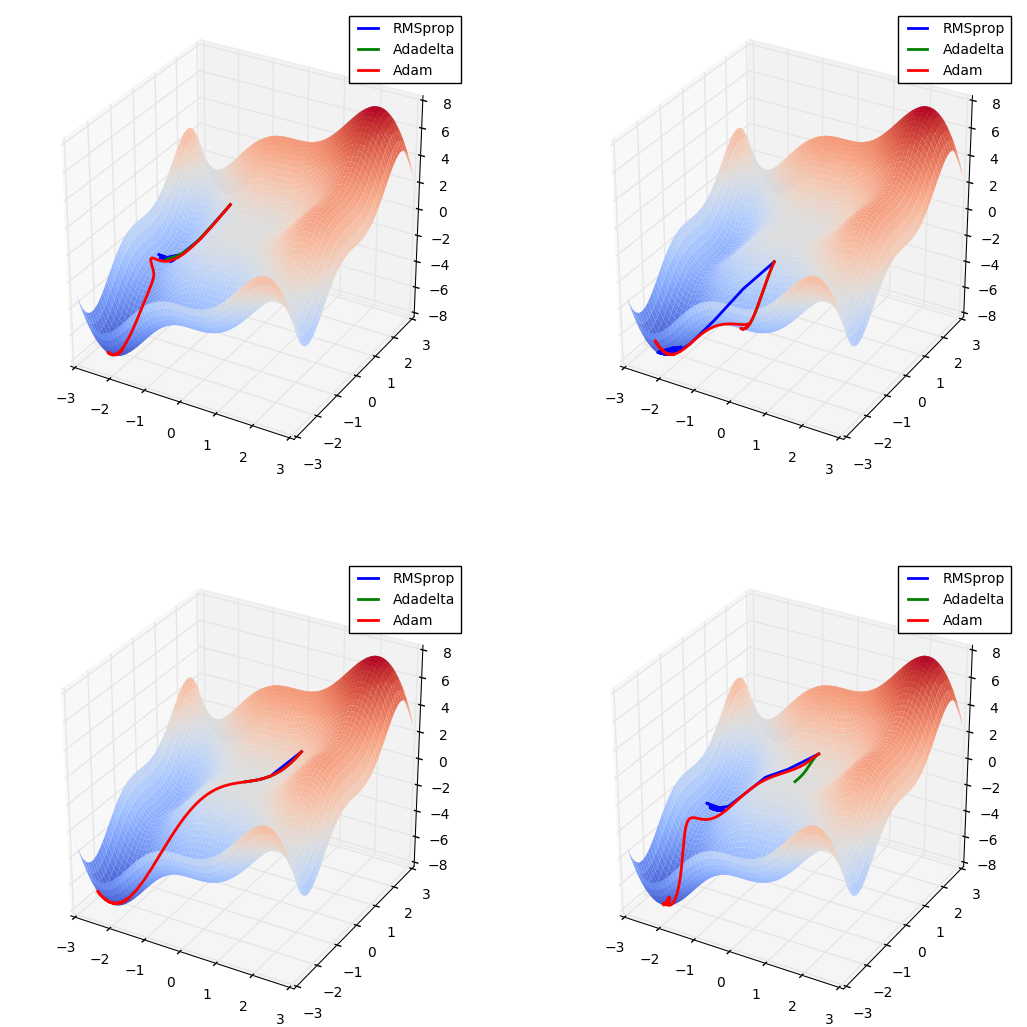

In [280]:
Smoothing = Smoothing1
start_points = [np.asarray([-1.0, 1.0]), np.asarray([0.01, -1.0]), np.asarray([1, 1]), np.asarray([0.1, 1.0])]
convergence_visualization(['RMSprop', 'Adadelta', 'Adam'], J3, J3_grad, start_points, (160, 160, 160, 160)\
                          , 2, 2, (13, 13), [(-3, 3, -3, 3), (-3, 3, -3, 3), (-3, 3, -3, 3), (-3, 3, -3, 3)])

<IPython.core.display.Javascript object>


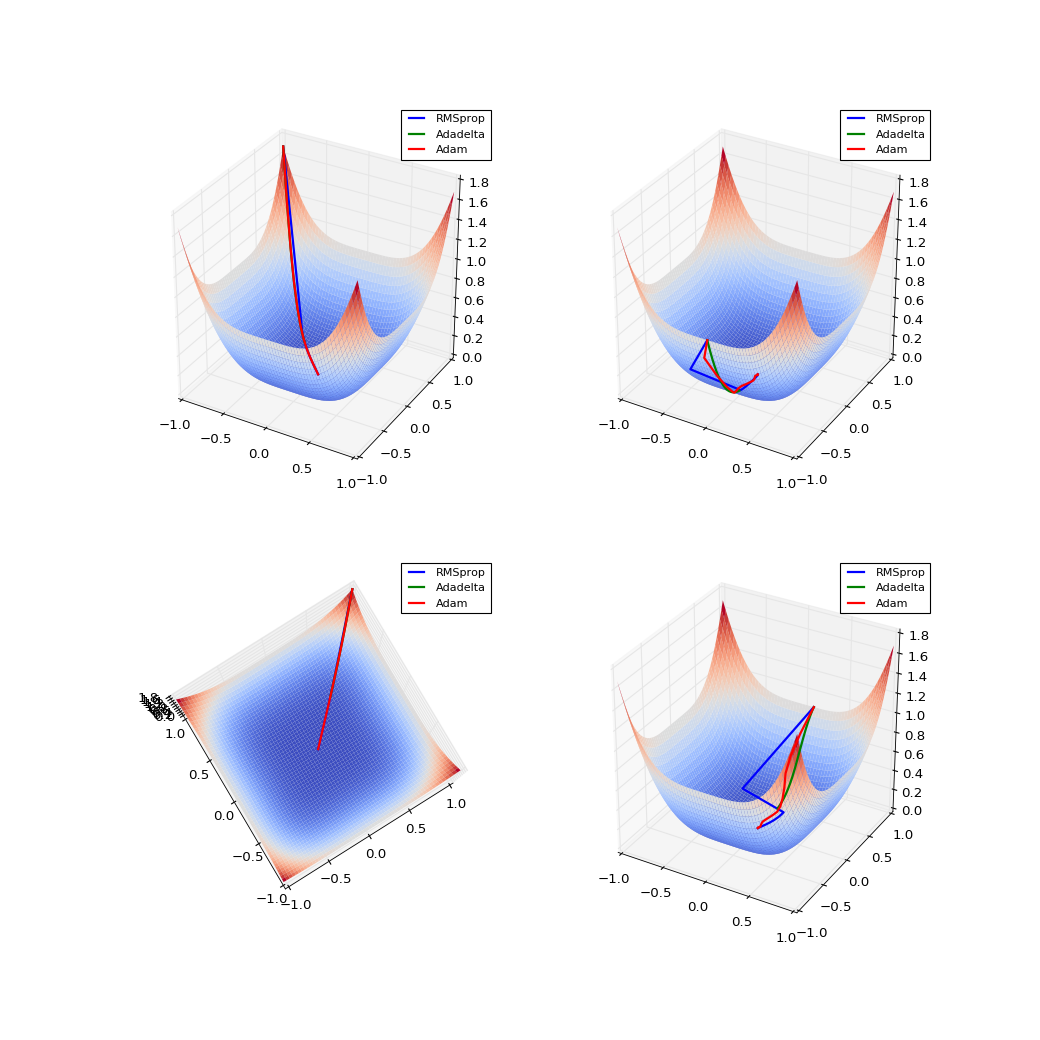

In [70]:
Smoothing = Smoothing2
start_points = [np.asarray([-1.0, 1.0]), np.asarray([0.01, -1.0]), np.asarray([1, 1]), np.asarray([0.1, 1.0])]
convergence_visualization(['RMSprop', 'Adadelta', 'Adam'], J4, J4_grad, start_points, (800, 800, 800, 800)\
                          , 2, 2, (13, 13), [(-1, 1, -1, 1), (-1, 1, -1, 1), (-1, 1, -1, 1), (-1, 1, -1, 1)])

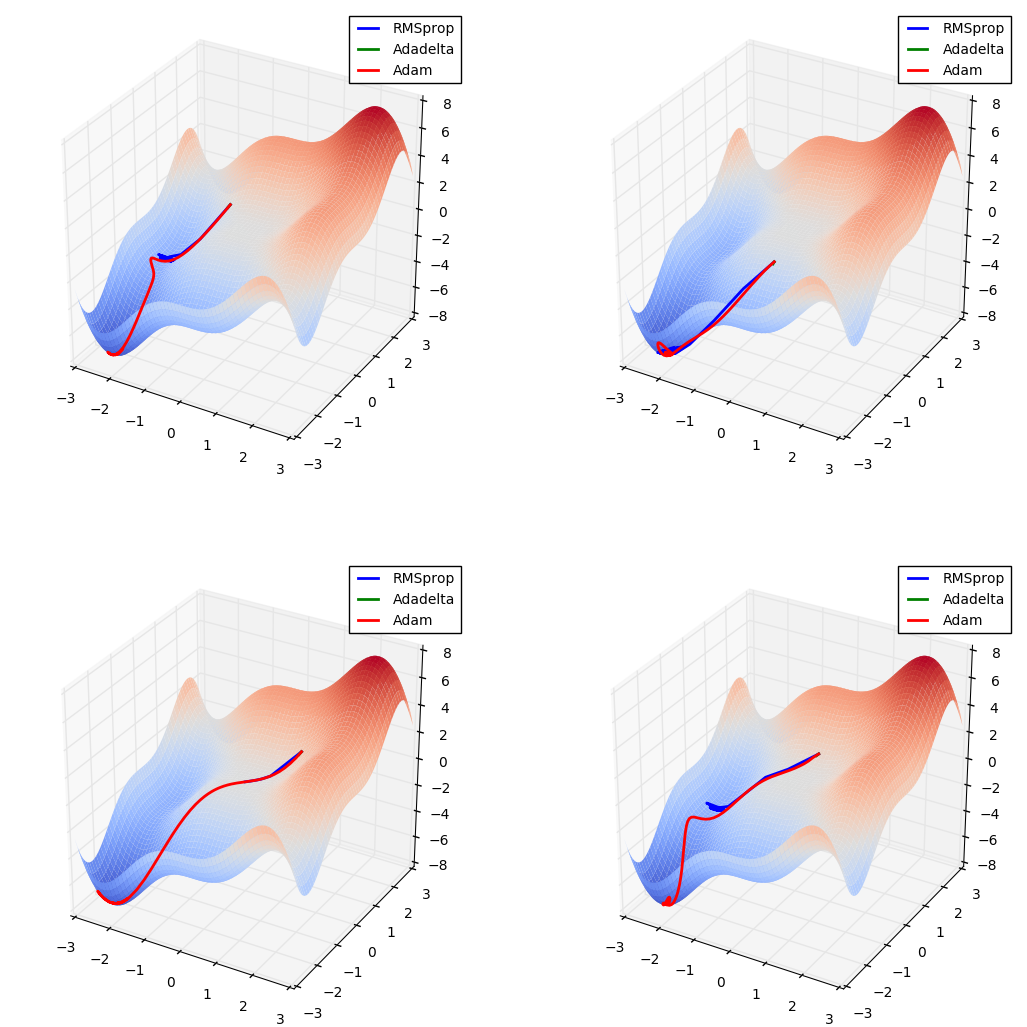

In [286]:
Smoothing = Smoothing2
start_points = [np.asarray([-1.0, 1.0]), np.asarray([0.01, -1.0]), np.asarray([1, 1]), np.asarray([0.1, 1.0])]
convergence_visualization(['RMSprop', 'Adadelta', 'Adam'], J3, J3_grad, start_points, (160, 160, 160, 160)\
                          , 2, 2, (13, 13), [(-3, 3, -3, 3), (-3, 3, -3, 3), (-3, 3, -3, 3), (-3, 3, -3, 3)])

Вывод:

Стратегия сглаживания sqrt(mean + eps) предпочтительнее, поскольку в этом случае качество сходимости в большинстве случаев лучше,и при этом, сглаживание sqrt(mean) + eps в общем случае сходится медленнее (например, для метода Adadelta ~ в 4 раза медленнее)

### Обновление RMS до обновления θ или после? - для методов Adagrad и Adadelta

1) Обновление theta до обновления RMS
2) Обновление theta после обновления RMS

In [331]:
#игнорируем первое обновление обновение theta, чтобы избежать скачка.
def Adagrad1_with_ignor(theta, grad, state):
    if 'G' not in state:
        state['G'] = np.zeros(shape = len(theta))
        gr =  grad(theta)
        state['G'] += gr ** 2
        return theta, state
        
    gr =  grad(theta)
    
    theta_new = theta - (state['eta'] / Smoothing(state['G'], state['eps'])) * gr
    state['G'] += gr ** 2
    return theta_new, state

def Adagrad1_without_ignor(theta, grad, state):
    if 'G' not in state:
        state['G'] = np.zeros(shape = len(theta)) + 0.0000001
        
    gr =  grad(theta)
    
    theta_new = theta - (state['eta'] / Smoothing(state['G'], state['eps'])) * gr
    state['G'] += gr ** 2
    return theta_new, state

#игнорируем первое обновление обновение theta, чтобы избежать скачка.
def Adadelta1_with_ignor(theta, grad, state):
    if 'E_g' not in state:
        state['E_g'] = np.zeros(shape = len(theta))
        state['E_delta_theta'] = np.zeros(shape = len(theta))
        gr =  grad(theta)
        state['E_g'] = state['E_g'] * state['gamma'] + (1 - state['gamma']) * (gr ** 2)
        return theta, state
        
    if 'E_delta_theta' not in state:
        state['E_delta_theta'] = np.zeros(shape = len(theta))
        
    gr =  grad(theta)   
    
    delta_theta = (Smoothing(state['E_delta_theta'], state['eps']) / Smoothing(state['E_g'], state['eps'])) * gr
#     print delta_theta
    theta_new = theta - delta_theta
    state['E_delta_theta'] = state['E_delta_theta'] * state['gamma'] + (1 - state['gamma']) * (delta_theta ** 2)
    state['E_g'] = state['E_g'] * state['gamma'] + (1 - state['gamma']) * (gr ** 2)
    
    return theta_new, state

def Adadelta1_without_ignor(theta, grad, state):
    if 'E_g' not in state:
        state['E_g'] = np.zeros(shape = len(theta)) + 0.00001
        
    if 'E_delta_theta' not in state:
        state['E_delta_theta'] = np.zeros(shape = len(theta))
        
    gr = grad(theta)   
    
    delta_theta = (Smoothing(state['E_delta_theta'], state['eps']) / Smoothing(state['E_g'], state['eps'])) * gr
    theta_new = theta - delta_theta
    state['E_g'] = state['E_g'] * state['gamma'] + (1 - state['gamma']) * (gr ** 2)
    state['E_delta_theta'] = state['E_delta_theta'] * state['gamma'] + (1 - state['gamma']) * (delta_theta ** 2)
    
    return theta_new, state

def Adagrad2(theta, grad, state):
    if 'G' not in state:
        state['G'] = np.zeros(shape = len(theta))
        
    gr =  grad(theta)
    state['G'] += gr ** 2
    theta_new = theta - (state['eta'] / Smoothing(state['G'], state['eps'])) * gr
    return theta_new, state


def Adadelta2(theta, grad, state):
    if 'E_g' not in state:
        state['E_g'] = np.zeros(shape = len(theta))
        
    if 'E_delta_theta' not in state:
        state['E_delta_theta'] = np.zeros(shape = len(theta))
        
    gr =  grad(theta)   
    state['E_g'] = state['E_g'] * state['gamma'] + (1 - state['gamma']) * (gr ** 2)
    
    delta_theta = (Smoothing(state['E_delta_theta'], state['eps']) / Smoothing(state['E_g'], state['eps'])) * gr
    theta_new = theta - delta_theta
    state['E_delta_theta'] = state['E_delta_theta'] * state['gamma'] + (1 - state['gamma']) * (delta_theta ** 2)
    
    return theta_new, state

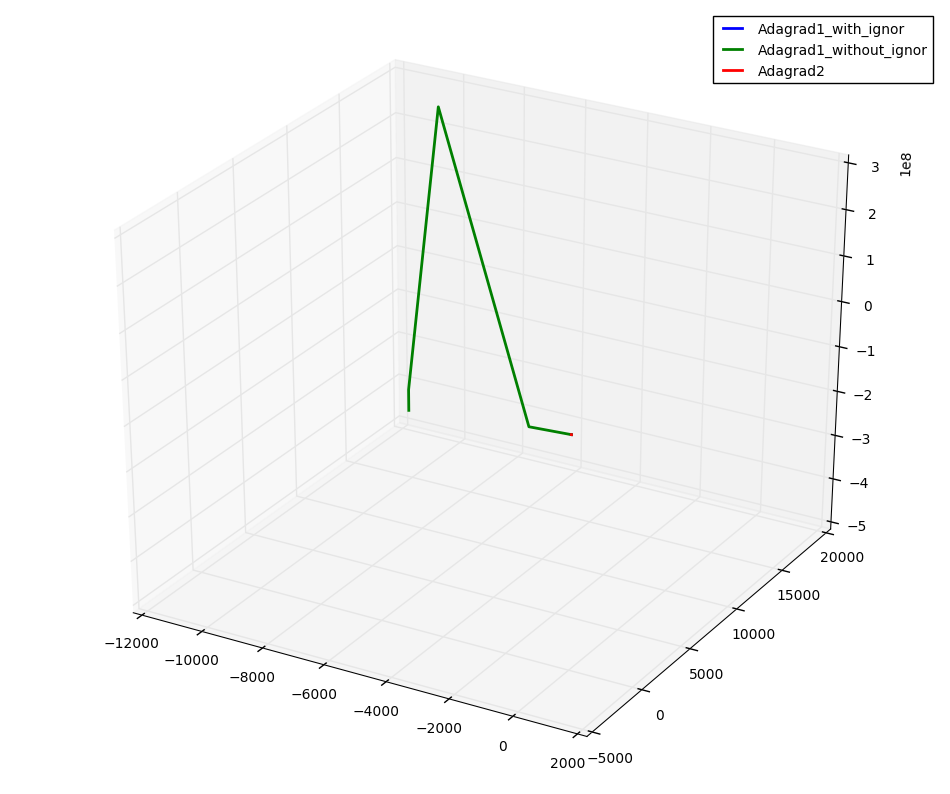

In [304]:
start_points = [np.asarray([2.0, 0.3])]
convergence_visualization(['Adagrad1_with_ignor', 'Adagrad1_without_ignor', 'Adagrad2'], J3, J3_grad, \
                           start_points, (10, 10), 1, 1, (12, 10), [(-3, 3, -3, 3)])

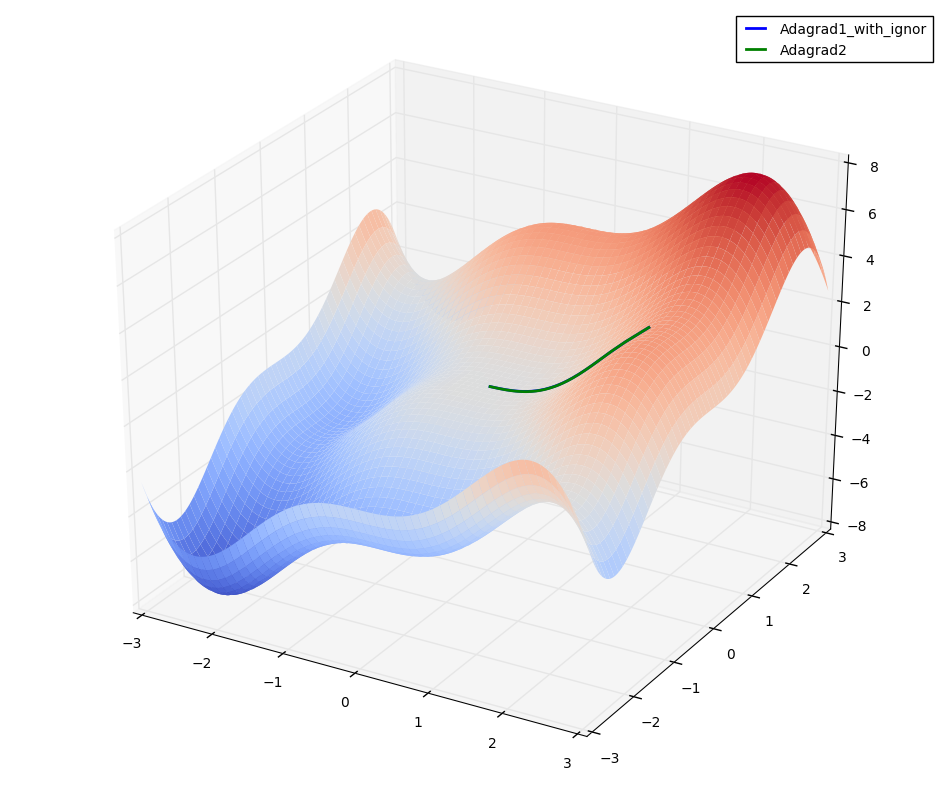

In [327]:
start_points = [np.asarray([2.0, 0.3])]
convergence_visualization(['Adagrad1_with_ignor', 'Adagrad2'], J3, J3_grad, \
                           start_points, (500, 500), 1, 1, (12, 10), [(-3, 3, -3, 3)])

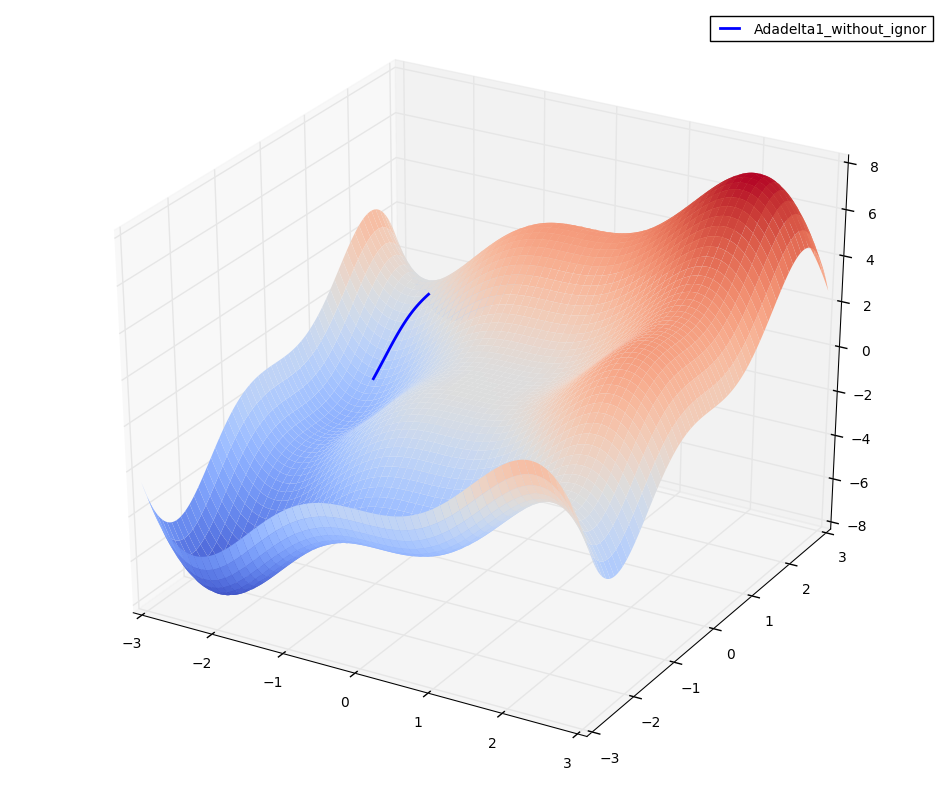

In [348]:
start_points = [np.asarray([-2.0, 2.0])]
convergence_visualization(['Adadelta1_without_ignor'], J3, J3_grad, \
                           start_points, (100, 100), 1, 1, (12, 10), [(-3, 3, -3, 3)])

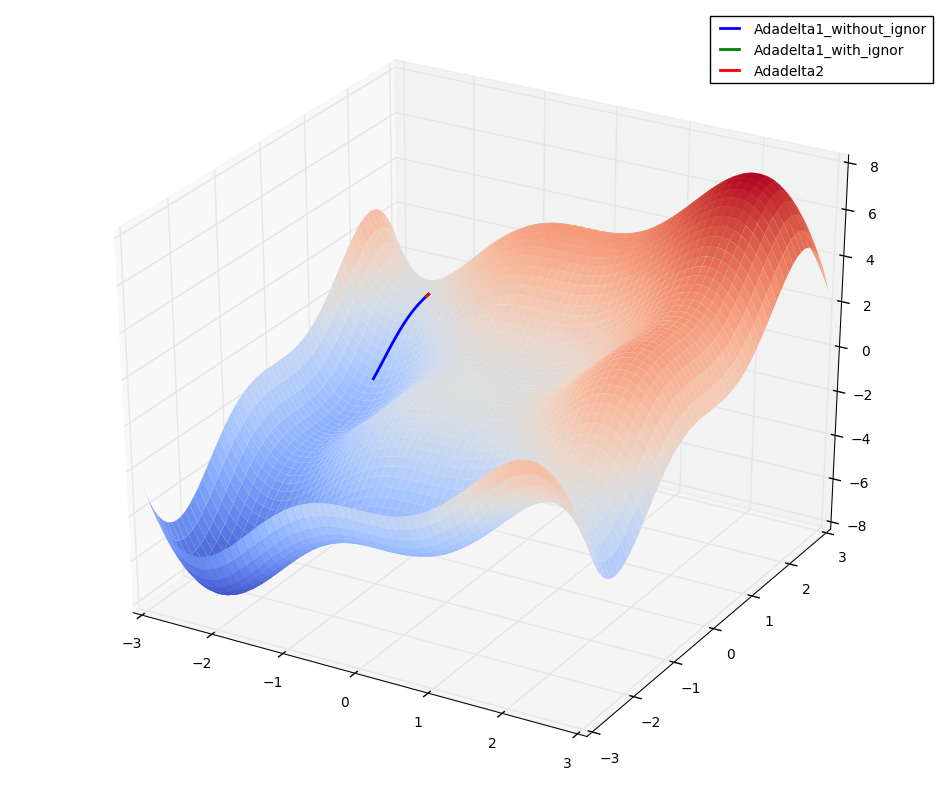

In [349]:
start_points = [np.asarray([-2.0, 2.0])]
convergence_visualization(['Adadelta1_without_ignor','Adadelta1_with_ignor',  'Adadelta2'], J3, J3_grad, \
                           start_points, (100, 100), 1, 1, (12, 10), [(-3, 3, -3, 3)])

Выводы:

1) Для метода Adagrad: При выборе стратегии обновления параметров до обновления RMS появляется проблема первых итераций: для них константное значение делится на маленькую(еще не обновленную величину) и возникает резкий скачок изменения параметров, который все портит. Эту проблему можно решить, если игнорировать первое изменение theta - в этом случае, по моим экспериментам, стратегии выбора места обновления существенно не отличаются.

2) Для метода Adadelta:Для Adadelta существенно более быструю сходимость показывает стратегия обновления параметра до обновления RMS.

## Optimized Backpropagation

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import sklearn.preprocessing
import random as r
import scipy.misc

In [233]:
def GD_bp(theta, grad, state):
    theta_new = theta - state['eta'] * grad
    return theta_new, state

def Momentum_bp(theta, grad, state):
    if 'v' not in state:
        state['v'] = np.zeros(shape = theta.shape)
        
    state['v'] = state['gamma'] * state['v'] + state['eta'] * grad
    theta_new = theta - state['v']
    return theta_new, state

def Adagrad_bp(theta, grad, state):
    if 'G' not in state:
        state['G'] = np.zeros(shape = theta.shape)
        
    gr =  grad
    state['G'] += gr ** 2
    theta_new = theta - (state['eta'] / Smoothing(state['G'], state['eps'])) * gr
    return theta_new, state

def RMSprop_bp(theta, grad, state):
    if 'E_g' not in state:
        state['E_g'] = np.zeros(shape = theta.shape)
        
    gr =  grad
    state['E_g'] = state['E_g'] * state['gamma'] + (1 - state['gamma']) * (gr ** 2)
    theta_new = theta - (state['eta'] / Smoothing(state['E_g'], state['eps'])) * gr
    return theta_new, state

def Adadelta_bp(theta, grad, state):
    if 'E_g' not in state:
        state['E_g'] = np.zeros(shape = theta.shape)
        
    if 'E_delta_theta' not in state:
        state['E_delta_theta'] = np.zeros(shape = theta.shape)
        
    gr = grad
   
    state['E_g'] = state['E_g'] * state['gamma'] + (1 - state['gamma']) * (gr ** 2)
    
    delta_theta = (Smoothing(state['E_delta_theta'], state['eps']) / Smoothing(state['E_g'], state['eps'])) * gr
    theta_new = theta - delta_theta
#     print "delta_theta", delta_theta
    state['E_delta_theta'] = state['E_delta_theta'] * state['gamma'] + (1 - state['gamma']) * (delta_theta ** 2)
    
    return theta_new, state

def Adam_bp(theta, grad, state):
    if 'm' not in state:
        state['m'] = np.zeros(shape = theta.shape)
        
    if 'v' not in state:
        state['v'] = np.zeros(shape = theta.shape)
        
    if 't' not in state:
        state['t'] = 1
    
    gr = grad
    state['m'] = state['beta1'] * state['m'] + (1 - state['beta1']) * gr
    state['v'] = state['beta2'] * state['v'] + (1 - state['beta2']) * (gr ** 2)
    
    m_roof = state['m'] / (1 - state['beta1'] ** state['t'])
    v_roof = state['v'] / (1 - state['beta2'] ** state['t'])
    
    state['t'] += 1
    
    theta_new = theta - (state['eta'] / Smoothing(v_roof, state['eps'])) * m_roof
    return theta_new, state

In [200]:
#theta - текущий вектор параметров, 1D numpy array
#grad - градиент функции (функция одного аргумента,возвращает 1D numpy array такого же размера как и theta)
#name - имя оптимизатора (’GD’|’Momentum’|’NAG’|’Adagrad’|’RMSprop’|’Adadelta’|’Adam’)
#state: словарь (dict) с состоянием оптимизатора. Содержит параметры методов, а также вспомогательные поля

def step_bp(theta, grad, name, state):
    if name == 'GD':
        theta_new, state = GD_bp(theta, grad, state)
    if name == 'Momentum':
        theta_new, state = Momentum_bp(theta, grad, state)
    if name == 'Adagrad':
        theta_new, state = Adagrad_bp(theta, grad, state)
    if name == 'RMSprop':
        theta_new, state = RMSprop_bp(theta, grad, state)
    if name == 'Adadelta':
        theta_new, state = Adadelta_bp(theta, grad, state)
    if name == 'Adam':
        theta_new, state = Adam_bp(theta, grad, state)
        
    return theta_new, state

In [192]:
def soft_softmax(x):
    x = np.array([x[i] - np.max(x[i]) for i in xrange(x.shape[0])])
    x = np.array([np.exp(x[i]) / np.sum(np.exp(x[i])) for i in xrange(x.shape[0])])
    return x

def activate(activate, x):
    if activate == 'sigmoid':
        return (1 / (1 + np.exp(-x)))
    elif activate == 'tanh':
        return np.tanh(x)
    elif activate == 'softmax':
        return soft_softmax(x)
    elif activate == 'ReLU':
        for i in xrange(x.shape[0]):
            for j in xrange(x.shape[1]):
                if (x[i][j] < 0):
                    x[i][j] = 0
        return x 
    
def deriv_activ(activate, x):
    if activate == 'sigmoid':
        return x * (1 - x)
    elif activate == 'tanh':
        return (1.0 - x**2)  
    elif activate == 'softmax':
        return x * (1 - x)
    elif activate == 'ReLU':
        for i in xrange(x.shape[0]):
            for j in xrange(x.shape[1]):
                if (x[i][j] < 0):
                    x[i][j] = 0
                else:
                    x[i][j] = 1
        return x 

In [210]:
class Layer:
    def __init__(self, num_nodes, prev_num_nodes = -1, bias = True, activate = "sigmoid", optimizer = 'GD'):
        self.num_nodes = num_nodes
        self.prev_num_nodes = prev_num_nodes
        self.need_bias = bias;
        print self.need_bias
        if (self.need_bias):
            self.bias = 2 * np.random.random((1, num_nodes)) - 1
        self.weights_matrix = None
        self.activate = activate
        self.optimizer_state = state_from_name(optimizer)
        self.optimizer = optimizer

    def forward_pass(self, X):
        if (self.weights_matrix is None) and (self.prev_num_nodes != 1):
            self.weights_matrix = 2*np.random.random((self.prev_num_nodes, self.num_nodes)) - 1

        if (self.need_bias):
            self.Y = activate(self.activate, np.dot(X, self.weights_matrix) + self.bias)
        else:
            self.Y = activate(self.activate, np.dot(X, self.weights_matrix))
        
        return self.Y
    
    def backward_pass(self, WeightedGradientNextLayer, learning_ratio, Y_prev): 
        #calculate gradient and update weights
        Delta = WeightedGradientNextLayer * deriv_activ(self.activate, self.Y)
        Gradient = Y_prev.T.dot(Delta)
        
        self.weights_matrix, self.optimizer_state = \
                    step_bp(self.weights_matrix, Gradient, self.optimizer, self.optimizer_state)
#         self.weights_matrix -= learning_ratio * Gradient
        
        if (self.need_bias):
            self.bias -= learning_ratio * Delta.mean(0)
        
        return (Delta.dot(self.weights_matrix.T))
    
class OutputLayer(Layer):
    def backward_begin (self, loss_function, OUT, learning_ratio, Y_prev):
        
        if loss_function == "MSE":
            Delta = -1 *(OUT - self.Y) * deriv_activ(self.activate, self.Y)
            Gradient = Y_prev.T.dot(Delta)
            Error = (((OUT - self.Y)**2).mean(axis = 1)).mean()

            self.weights_matrix -= learning_ratio * Gradient
            if (self.need_bias):
                #print "bias", self.bias
                #print "delta", Delta.sum()
                self.bias -= learning_ratio * Delta.mean(0)
            
            
        elif loss_function == "NLL":
            
            Error = -1 * (OUT * np.log(self.Y)).sum()
            
            #print self.Y
            Delta = (self.Y - OUT)
            Gradient = Y_prev.T.dot(Delta)
            #print "Gradient: " + str(Gradient[0])
#             self.weights_matrix -= learning_ratio * Gradient

            self.weights_matrix, self.optimizer_state = \
                        step_bp(self.weights_matrix, Gradient, self.optimizer, self.optimizer_state)
            if (self.need_bias):
                self.bias -= learning_ratio * Delta.mean(0)
        
        return Delta.dot(self.weights_matrix.T), Error
    
    
class InputLayer(Layer):
    def forward_begin (self, X):
        self.Y = X
        
        return self.Y
        
        

In [269]:
class Neural_Network:
    def __init__(self, layers):
        self.layers = layers
        self.log_error = []
        self.log_iter = []
        
    def fit(self, X, OUT, batch_size, iteration, learning_ratio, loss_function):

        for iterat in xrange(iteration):
            
            batch_sample = r.sample(xrange(X.shape[0]), batch_size)                
            #batch_sample = xrange(batch_size)
            
            self.layers[0].forward_begin(X[batch_sample])
            
            for i in xrange(1, len(self.layers)):
                self.layers[i].forward_pass(self.layers[i - 1].Y)
    
            WeightedGradientNextLayer_tmp, Error = self.layers[len(self.layers) - 1].backward_begin(loss_function,\
                                                        OUT[batch_sample], learning_ratio, \
                                                        self.layers[len(self.layers) - 2].Y)
        
            for i in xrange(len(self.layers) - 2, 0, -1):
                WeightedGradientNextLayer_tmp = self.layers[i].backward_pass(WeightedGradientNextLayer_tmp, \
                                                                       learning_ratio, self.layers[i - 1].Y)
            
            right_cnt = 0
            if iterat % 300 == 0:
                print "________________________________________________"
                print "Iteration: " + str(iterat)
                print 'Error: '  + str(Error)
                self.log_error.append(Error)
                self.log_iter.append(iterat)
                
                for i in xrange(batch_size):
                    if np.argmax(self.layers[len(self.layers) - 1].Y[i]) == np.argmax(OUT[batch_sample[i]]):
                        right_cnt += 1
                
                print "True identified: " + str(right_cnt) + "|" + str(batch_size)
                
        return self.log_error, self.log_iter
            
                
    
    def predict(self, X):
        self.layers[0].forward_begin(X)
        for i in xrange(1, len(self.layers)):
            self.layers[i].forward_pass(self.layers[i - 1].Y)
        
        if self.layers[len(self.layers) - 1].activate == 'softmax':
            self.layers[len(self.layers) - 1].Y = soft_softmax(self.layers[len(self.layers) - 1].Y)
        return self.layers[len(self.layers) - 1].Y
                
                

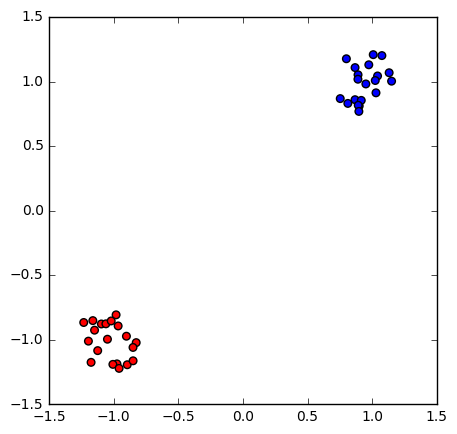

True
True
________________________________________________
Iteration: 0
Error: 9.52354089765
True identified: 20|20
________________________________________________
Iteration: 300
Error: 0.00765244393922
True identified: 20|20
[[-2.0045766   1.8707261 ]
 [-2.35367689  2.06205896]]
[[ 0.05290701  0.37503988]]


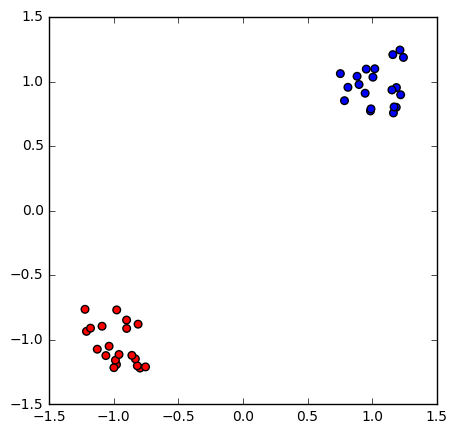

In [212]:
simple_train =np.array([[-1.0, -1.0]] * 20 + [[1, 1.0]] * 20)
simple_check = np.array([[1.0, 0.0]] * 20 + [[0.0, 1.0]] * 20)

for i in xrange(len(simple_train)):
    (simple_train[i])[0] += np.random.sample() / 2 - 0.25
    (simple_train[i])[1] += np.random.sample() / 2 - 0.25
    
plt.figure(figsize = (5, 5))
plt.scatter(simple_train[:, 0], simple_train[:, 1],s = 30,\
            c = ['r' if simple_check[i][0] == 1.0 else 'b' for i in xrange(len(simple_check))])
plt.show()

Layer1 = InputLayer(num_nodes = 2, bias = True)
Layer2 = OutputLayer(num_nodes = 2, prev_num_nodes = 2,bias = True,activate = 'softmax')

simple_model = Neural_Network([Layer1, Layer2])
simple_model.fit(simple_train, simple_check, 20, 400, learning_ratio = 0.1, loss_function = "NLL")
print Layer2.weights_matrix
print Layer2.bias

#на этих тестировать 
simple_test =np.array([[-1.0, -1]] * 20 + [[1, 1.0]] * 20)

for i in xrange(len(simple_test)):
    (simple_test[i])[0] += np.random.sample() / 2 - 0.25
    (simple_test[i])[1] += np.random.sample() / 2 - 0.25
    
simple_predict = simple_model.predict(simple_test)
#print simple_predict
    
plt.figure(figsize = (5, 5))
plt.scatter(simple_test[:, 0], simple_test[:, 1],s = 30,\
            c = ['r' if simple_predict[i][0] > 0.5 else 'b' for i in xrange(len(simple_check))])
plt.show() 

In [228]:
def read(dataset = "training", path = "/home/dana_zl/Technosphera/Neural_Network/"):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError, "dataset must be 'testing' or 'training'"
        
    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
        
    print img.shape
    print lbl, len(lbl)
    
    IMG = np.array([img[i].reshape(784) for i in xrange(len(lbl))])
    LBL = np.zeros((len(lbl), 10))
    for i in xrange(len(lbl)):
        LBL[i][lbl[i]] = 1
    
    return IMG, LBL

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [229]:
TRAIN_IMG, TRAIN_LBL = read(dataset = "training")
TRAIN_IMG_NORM = sklearn.preprocessing.normalize(TRAIN_IMG, norm = 'max')
print TRAIN_LBL.shape

(60000, 28, 28)
[5 0 4 ..., 5 6 8] 60000
(60000, 10)


In [230]:
print str(TRAIN_IMG[20007].reshape(28, 28))
print TRAIN_LBL[20007]

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  15  24 118 138 139 138 138  97  24  22   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  57 219 252 252 252 253 252 252 252 252 245 140  13   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 253 252 252 252 252 253 252 252 252 252 253 252 171  13
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  56 160 160 160  56  46  45  45  45  98 211 252 252 139
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  34 25

In [274]:
inp = InputLayer(784)
hidden = Layer(300, prev_num_nodes = 784, bias = True, activate = "sigmoid")
out = OutputLayer(10, prev_num_nodes = 300, bias = True, activate = 'softmax')

MNIST_model = Neural_Network([inp, hidden, out])
GD_error, GD_iter = MNIST_model.fit(TRAIN_IMG_NORM, TRAIN_LBL, 60, 8000, \
                                    learning_ratio = 0.01, loss_function = "MSE")

True
True
True
________________________________________________
Iteration: 0
Error: 0.155117792991
True identified: 8|60
________________________________________________
Iteration: 300
Error: 0.016737411778
True identified: 53|60
________________________________________________
Iteration: 600
Error: 0.0174180281181
True identified: 50|60
________________________________________________
Iteration: 900
Error: 0.0137912909219
True identified: 55|60
________________________________________________
Iteration: 1200
Error: 0.0136365617714
True identified: 55|60
________________________________________________
Iteration: 1500
Error: 0.00687459004953
True identified: 59|60
________________________________________________
Iteration: 1800
Error: 0.0142078109883
True identified: 54|60
________________________________________________
Iteration: 2100
Error: 0.00419456258971
True identified: 58|60
________________________________________________
Iteration: 2400
Error: 0.00370146074571
True identified

In [275]:
inp = InputLayer(784)
hidden = Layer(300, prev_num_nodes = 784, bias = True, activate = "sigmoid", optimizer='Adadelta')
out = OutputLayer(10, prev_num_nodes = 300, bias = True, activate = 'softmax', optimizer='Adadelta')

MNIST_model = Neural_Network([inp, hidden, out])
Adadelta_error, Adadelta_iter = MNIST_model.fit(TRAIN_IMG_NORM, TRAIN_LBL, 60, 8000, \
                                    learning_ratio = 0.01, loss_function = "MSE")

True
True
True
________________________________________________
Iteration: 0
Error: 0.1536552734
True identified: 6|60
________________________________________________
Iteration: 300
Error: 0.0135840063012
True identified: 53|60
________________________________________________
Iteration: 600
Error: 0.0159642214953
True identified: 53|60
________________________________________________
Iteration: 900
Error: 0.0051338824262
True identified: 58|60
________________________________________________
Iteration: 1200
Error: 0.00435896413567
True identified: 59|60
________________________________________________
Iteration: 1500
Error: 0.0119303762082
True identified: 55|60
________________________________________________
Iteration: 1800
Error: 0.000531109503376
True identified: 60|60
________________________________________________
Iteration: 2100
Error: 0.00384286880326
True identified: 59|60
________________________________________________
Iteration: 2400
Error: 0.00107271564987
True identifie

In [276]:
inp = InputLayer(784)
hidden = Layer(300, prev_num_nodes = 784, bias = True, activate = "sigmoid", optimizer='Adagrad')
out = OutputLayer(10, prev_num_nodes = 300, bias = True, activate = 'softmax', optimizer='Adagrad')

MNIST_model = Neural_Network([inp, hidden, out])
Adagrad_error, Adagrad_iter = MNIST_model.fit(TRAIN_IMG_NORM, TRAIN_LBL, 60, 8000, \
                                    learning_ratio = 0.01, loss_function = "MSE")

True
True
True
________________________________________________
Iteration: 0
Error: 0.149451390165
True identified: 4|60
________________________________________________
Iteration: 300
Error: 0.0179313719393
True identified: 51|60
________________________________________________
Iteration: 600
Error: 0.017064313312
True identified: 54|60
________________________________________________
Iteration: 900
Error: 0.0176934360058
True identified: 54|60
________________________________________________
Iteration: 1200
Error: 0.00616387984114
True identified: 58|60
________________________________________________
Iteration: 1500
Error: 0.0126509356668
True identified: 55|60
________________________________________________
Iteration: 1800
Error: 0.0159138986907
True identified: 55|60
________________________________________________
Iteration: 2100
Error: 0.017396950873
True identified: 53|60
________________________________________________
Iteration: 2400
Error: 0.00933387893158
True identified: 

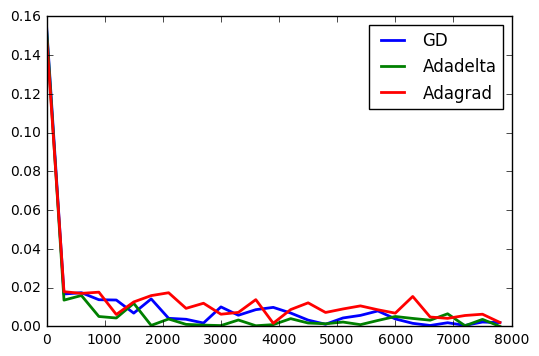

In [277]:
plt.plot(GD_iter, GD_error, linewidth=2, label='GD')
plt.plot(Adadelta_iter, Adadelta_error, linewidth=2, label='Adadelta')
plt.plot(Adagrad_iter, Adagrad_error, linewidth=2, label='Adagrad')
plt.legend()